In [1]:
import numpy as np

In [2]:
grasp_data = np.load("bunny_20118.npy")

In [3]:
grasp_data.shape

(131009, 157)

In [4]:
grasp_data[-1]

array([ 4.84441132e+03,  2.01000000e+02,  4.34338021e-02, -2.66574801e-01,
        4.07472736e-01,  5.01731952e-01, -4.97709119e-01,  4.98938343e-01,
        5.01608624e-01,  3.92970412e-01,  7.53707530e-01,  1.05000403e+00,
        9.20117446e-01, -1.92749586e-01,  1.30324158e+00,  7.93431516e-01,
        4.19538530e-01,  6.29311911e-03,  1.24475246e+00,  4.49996565e-01,
        2.77948707e-01, -2.20714864e-02,  1.06571301e+00,  5.55668489e-01,
        3.62281689e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.07999516e-02, -1.50775968e-01,  2.79840796e-01,
       -9.04563756e-03, -1.23126419e-01, -8.13250981e-02, -6.50697999e-04,
       -1.41846617e-01,  2.83934196e-01,  1.52137283e-02, -9.69155181e-02,
        8.94552392e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [5]:
down_sampling = 1
grasp_data = grasp_data[::down_sampling, :]
grasp_data.shape

(131009, 157)

In [6]:
if grasp_data.shape[1] == 1 + 7 + 16 + 6 * 22:
    timestamp = grasp_data[:, 0]
    grasp_data = grasp_data[:, 1:]
elif grasp_data.shape[1] == 2 + 7 + 16 + 6 * 22:
    timestamp = grasp_data[:, 0]
    steps = grasp_data[:, 1]
    grasp_data = grasp_data[:, 2:]
else:
    raise NotImplementedError
grasp_data.shape

(131009, 155)

In [7]:
contact_points = [[], [], [], []]

In [8]:
i = 0
threshold = 0.03
while 1:
    contact = grasp_data[i, 23:].reshape(22, 6)
    for j in range(4):
        if np.linalg.norm(contact[j, :]) > 1e-5:
            if len(contact_points[j]) != 0:
                if np.linalg.norm(contact[j, :]) > 1e-5 and np.linalg.norm(
                        contact_points[j][-1, :3] - contact[j, :3]) > threshold:
                    contact_points[j] = np.vstack([contact_points[j], contact[j, :3].reshape(1, -1)])
            else:
                contact_points[j] = contact[j, :3].reshape(1, -1)
                
    i += 1
    if i == grasp_data.shape[0]:
        break

In [9]:
merged_contact_points = np.vstack(contact_points)

In [10]:
merged_contact_points.shape

(590, 3)

In [11]:
np.save("contact_points_merged.npy", merged_contact_points)

In [12]:
contact_points[0].shape

(164, 3)

In [13]:
contact_points[1].shape

(128, 3)

In [14]:
contact_points[2].shape

(147, 3)

In [15]:
contact_points[3].shape

(151, 3)

In [16]:
contact_points[3]

array([[ 6.33832178e-02, -1.95874939e-01,  3.63016312e-01],
       [ 3.13629403e-02, -1.92136802e-01,  3.63477838e-01],
       [ 3.36370337e-03, -2.02442426e-01,  3.68259344e-01],
       [ 1.43005367e-02, -2.26961142e-01,  3.81675457e-01],
       [ 2.33303723e-02, -2.00149963e-01,  3.69452108e-01],
       [ 2.13376669e-02, -1.79743504e-01,  3.45339781e-01],
       [ 7.94988649e-03, -1.66663204e-01,  3.19757985e-01],
       [ 3.53726217e-02, -1.59386939e-01,  3.09988996e-01],
       [ 6.36780522e-02, -1.66279742e-01,  3.02792864e-01],
       [ 7.45189277e-02, -1.79233763e-01,  3.27669032e-01],
       [ 4.34340407e-02, -1.83217928e-01,  3.54446201e-01],
       [ 2.18334712e-02, -1.98327832e-01,  3.69339367e-01],
       [ 2.00404117e-02, -2.25447880e-01,  3.82220842e-01],
       [-4.67410176e-02, -2.26473173e-01,  4.58891461e-01],
       [-3.04097929e-02, -2.10714331e-01,  4.78626775e-01],
       [-1.61257457e-02, -1.82810425e-01,  4.82742157e-01],
       [-4.17917851e-02, -1.98189039e-01

In [17]:
import open3d as o3d
import numpy as np

colors = [
    [1, 0, 0],  # 红色
    [0, 1, 0],  # 绿色
    [0, 0, 1],  # 蓝色
    [1, 1, 0]   # 黄色
]

def visualize_point_cloud_inline(points_list):
    pcds = []
    for i, points in enumerate(points_list):
        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(points)
        pcd.colors = o3d.utility.Vector3dVector(np.tile(colors[i], (points.shape[0], 1)))
        pcds.append(pcd)
    
    vis = o3d.visualization.Visualizer()
    vis.create_window(visible=True)
    for pcd in pcds:
        vis.add_geometry(pcd)
    vis.poll_events()
    vis.update_renderer()
    vis.capture_screen_image("temp.png")
    vis.destroy_window()
    
    from IPython.display import display, Image
    display(Image("temp.png"))


def visualize_point_cloud(points_list):
    pcds = []
    for i, points in enumerate(points_list):
        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(points)
        pcd.colors = o3d.utility.Vector3dVector(np.tile(colors[i], (points.shape[0], 1)))
        pcds.append(pcd)
    
    o3d.visualization.draw_geometries(pcds)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


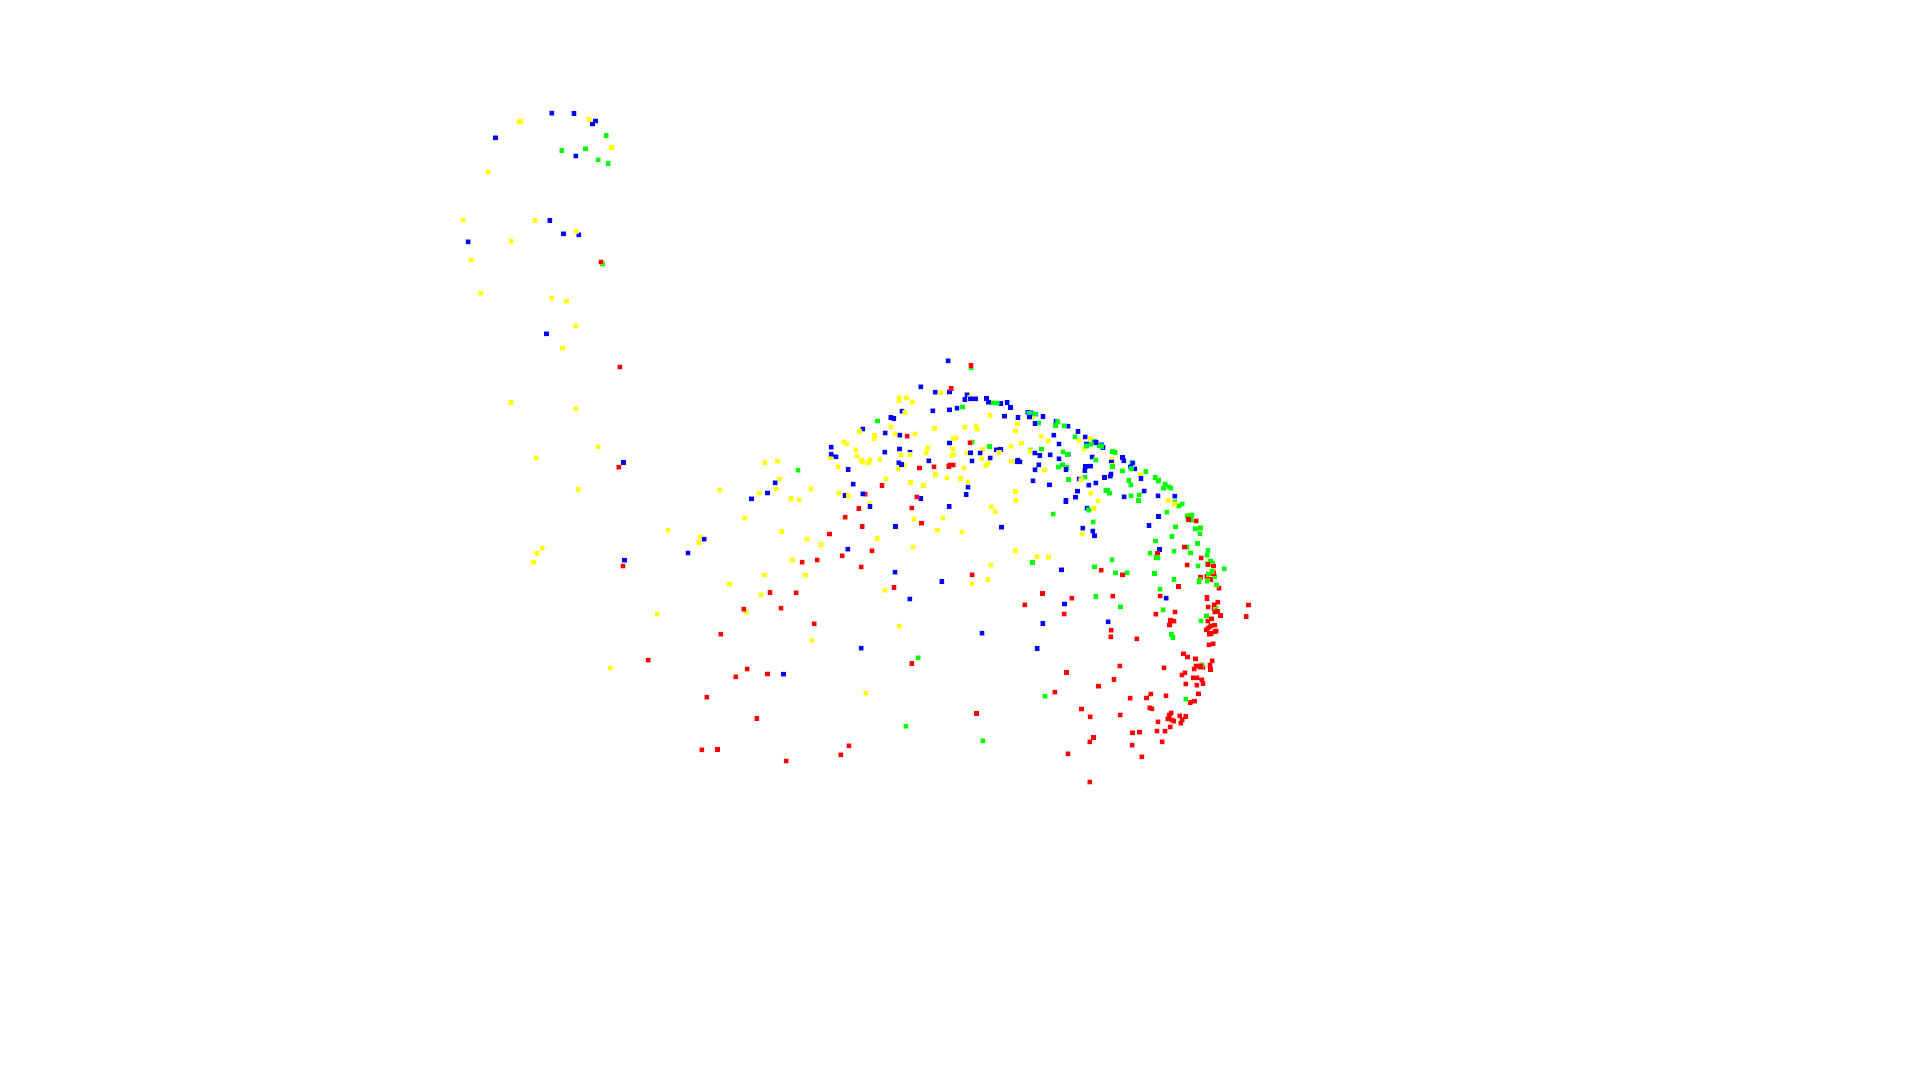

In [18]:
visualize_point_cloud_inline(contact_points)

In [19]:
visualize_point_cloud(contact_points)

In [185]:
points_list = np.array(contact_points, dtype=object)

In [58]:
points_list.shape

(4,)

In [56]:
points_list[0].shape

(164, 3)

In [71]:
import torch
contact_points = [torch.tensor(arr) for arr in contact_points]
a, b, c, d = [list.shape[0] for list in contact_points]

In [72]:
a

164

In [59]:
np.save('points_list.npy', points_list)

In [186]:
import torch
import gpytorch
import numpy as np
import matplotlib.pyplot as plt

class ObjectShapeGP(gpytorch.models.ExactGP):
    def __init__(self, train_x, train_y, likelihood):
        super(ObjectShapeGP, self).__init__(train_x, train_y, likelihood)
        # self.mean_module = gpytorch.means.ConstantMean()
        # self.covar_module = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())
        self.mean_module = gpytorch.means.ZeroMean()
        self.covar_module = gpytorch.kernels.ScaleKernel(
            gpytorch.kernels.RBFKernel(ard_num_dims=3)
        )

    def forward(self, x):
        mean_x = self.mean_module(x)
        covar_x = self.covar_module(x)
        return gpytorch.distributions.MultivariateNormal(mean_x, covar_x)

In [187]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [188]:
def smooth(points, value, sigma=0.005, thresh = 0.5):
    mask_one = value == 1
    one_points = points[mask_one]

    distances = torch.cdist(points, one_points)
    min_dist, _ = distances.min(dim=1)
    # smooth_values = (0.9 * value + 0.1 * torch.exp(-min_dist ** 2 / (2 * sigma ** 2))).clamp(max=1)
    smooth_values = torch.exp(-min_dist ** 2 / (2 * sigma ** 2))

    # smooth_values_final = smooth_values.clone()
    # smooth_values_final[mask_one] = 1.0
    return smooth_values

In [175]:
int(max([a,b,c,d]) / 10)

16

In [176]:
def explore_and_update_gp(model, likelihood, train_x, train_y, sampled_points):
    observed_values = torch.ones(sampled_points.shape[0]).to(device)
    
    train_x = torch.cat([train_x, sampled_points], dim=0)
    train_y = torch.cat([train_y, observed_values], dim=0)
    
    train_x_pre = train_x.clone()
    train_y_pre = smooth(train_x, train_y)
    # train_y_pre = train_y.clone()
    # 重新训练 GP
    model.set_train_data(train_x_pre, train_y_pre, strict=False)
    model.train()
    likelihood.train()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

    for _ in range(500):
        optimizer.zero_grad()
        output = model(train_x_pre)
        loss = -mll(output, train_y_pre.nan_to_num(0.0))
        loss.backward()
        optimizer.step()
    print(train_y_pre)
    return model, train_x, train_y_pre


In [177]:
contact_points[0][0*10:(0+1)*10, :]

tensor([[ 0.1133, -0.2500,  0.3375],
        [ 0.0968, -0.2638,  0.3585],
        [ 0.0766, -0.2856,  0.3630],
        [ 0.0668, -0.2625,  0.3796],
        [ 0.0839, -0.2390,  0.3714],
        [ 0.1002, -0.2209,  0.3534],
        [ 0.1065, -0.2023,  0.3300],
        [ 0.1168, -0.2023,  0.3017],
        [ 0.1260, -0.2292,  0.2922],
        [ 0.1244, -0.2591,  0.2948]], dtype=torch.float64)

In [178]:
def generate_initial_cube():
    x = np.linspace(-2e-0, 2e-0, 10)
    y = np.linspace(-2e-0, 2e-0, 10)
    z = np.linspace(-2e-0, 2e-0, 10)
    X, Y, Z = np.meshgrid(x, y, z)
    return np.vstack([X.flatten(), Y.flatten(), Z.flatten()]).T
train_points = torch.tensor(generate_initial_cube(), dtype=torch.float32).to(device)
train_values = torch.zeros((train_points.shape[0],), dtype=torch.float32).to(device)
# train_values = torch.ones((train_points.shape[0],), dtype=torch.float32).to(device)

In [179]:
likelihood = gpytorch.likelihoods.GaussianLikelihood().to(device)
model = ObjectShapeGP(train_points, train_values, likelihood).to(device)

In [180]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

<IPython.core.display.Javascript object>

In [183]:
%matplotlib notebook
for i in range(int(max([a,b,c,d]) / 10) - 1):
    batch_list = []
    if i * 10 < a:
        batch_list.append(contact_points[0][i*10:(i+1)*10, :])
    if i * 10 < b:
        batch_list.append(contact_points[1][i*10:(i+1)*10, :])
    if i * 10 < c:
        batch_list.append(contact_points[2][i*10:(i+1)*10, :])
    if i * 10 < d:
        batch_list.append(contact_points[3][i*10:(i+1)*10, :])
        
    if batch_list:
        point_array = torch.cat(batch_list, dim=0).to(device)  # 按行拼接
        print(point_array.shape)
        model, train_points, train_values = explore_and_update_gp(model, likelihood, train_points, train_values, point_array)
        # print(train_values)
        
        with torch.no_grad():
            pred_dist = model(train_points)
            mean = pred_dist.mean.cpu().numpy()
        # train_values = pred_dist.mean
        ax.clear()
        mask = mean > 0.5
        print(len(mask == True))
        train_points_cpu = train_points.cpu().numpy()
        ax.scatter(train_points_cpu[:, 0][mask],
                   train_points_cpu[:, 1][mask],
                   train_points_cpu[:, 2][mask],
                   c=mean[mask], marker='o')
        ax.set_xlim([-2e-0, 2e-0])
        ax.set_ylim([-2e-0, 2e-0])
        ax.set_zlim([-2e-0, 2e-0])
        ax.set_title(f"Iteration {i + 1}: Reconstructed Object")
        plt.draw()
        plt.pause(1)


torch.Size([40, 3])
tensor([0., 0., 0.,  ..., 1., 1., 1.], device='cuda:0', dtype=torch.float64)
1935
torch.Size([40, 3])
tensor([0., 0., 0.,  ..., 1., 1., 1.], device='cuda:0', dtype=torch.float64)
1975
torch.Size([40, 3])
tensor([0., 0., 0.,  ..., 1., 1., 1.], device='cuda:0', dtype=torch.float64)
2015
torch.Size([40, 3])
tensor([0., 0., 0.,  ..., 1., 1., 1.], device='cuda:0', dtype=torch.float64)
2055
torch.Size([40, 3])
tensor([0., 0., 0.,  ..., 1., 1., 1.], device='cuda:0', dtype=torch.float64)
2095
torch.Size([40, 3])
tensor([0., 0., 0.,  ..., 1., 1., 1.], device='cuda:0', dtype=torch.float64)
2135
torch.Size([40, 3])
tensor([0., 0., 0.,  ..., 1., 1., 1.], device='cuda:0', dtype=torch.float64)
2175
torch.Size([40, 3])
tensor([0., 0., 0.,  ..., 1., 1., 1.], device='cuda:0', dtype=torch.float64)
2215
torch.Size([40, 3])
tensor([0., 0., 0.,  ..., 1., 1., 1.], device='cuda:0', dtype=torch.float64)
2255
torch.Size([40, 3])
tensor([0., 0., 0.,  ..., 1., 1., 1.], device='cuda:0', dtype=

In [160]:
plt.show()

In [159]:
train_points_cpu

array([[-0.2       , -0.2       , -0.2       ],
       [-0.2       , -0.2       ,  0.        ],
       [-0.2       , -0.2       ,  0.2       ],
       ...,
       [-0.10319444, -0.10366995,  0.48502673],
       [-0.08941657, -0.09912961,  0.4582548 ],
       [-0.03752216, -0.16985929,  0.29973107]])

In [161]:
train_values

tensor([ 0.0000e+00,  0.0000e+00, 9.7123e-118,  ...,  1.0000e+00,
         1.0000e+00,  1.0000e+00], device='cuda:0', dtype=torch.float64)